In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("admissions.csv")
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
df=df.drop("Serial No.",axis=1)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                400 non-null    int64  
 1   TOEFL              400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Admission_Chance   400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1+ KB


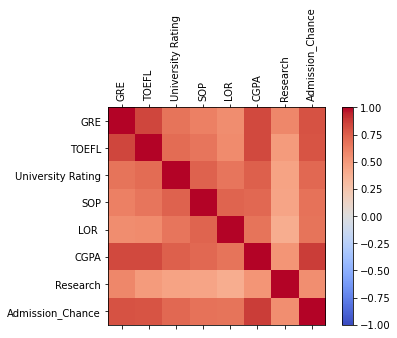

In [4]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [5]:
model = Sequential()
model.add(Dense(7, input_dim=7, activation='relu'))
model.add(Dense(7, input_dim=7, activation='relu'))
model.add(Dense(1))

In [6]:
model.compile(loss='mse', optimizer = Adam(learning_rate=0.01))

In [7]:
X=np.asarray(df.drop("Admission_Chance",axis=1))
y=np.asarray(df["Admission_Chance"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [9]:
model.fit(x=X_train, y=y_train, epochs = 200, validation_split=0.2, batch_size = 128, verbose = 1, callbacks = EarlyStopping(monitor='loss', patience=10))

Epoch 1/200
2/2 [==============================] - 2s 633ms/step - loss: 0.1139 - val_loss: 0.0637
Epoch 2/200
2/2 [==============================] - 0s 126ms/step - loss: 0.0682 - val_loss: 0.0670
Epoch 3/200
2/2 [==============================] - 0s 77ms/step - loss: 0.0681 - val_loss: 0.0512
Epoch 4/200
2/2 [==============================] - 0s 195ms/step - loss: 0.0505 - val_loss: 0.0337
Epoch 5/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0341 - val_loss: 0.0267
Epoch 6/200
2/2 [==============================] - 0s 160ms/step - loss: 0.0278 - val_loss: 0.0237
Epoch 7/200
2/2 [==============================] - 0s 60ms/step - loss: 0.0232 - val_loss: 0.0182
Epoch 8/200
2/2 [==============================] - 0s 101ms/step - loss: 0.0167 - val_loss: 0.0143
Epoch 9/200
2/2 [==============================] - 0s 101ms/step - loss: 0.0135 - val_loss: 0.0158
Epoch 10/200
2/2 [==============================] - 0s 104ms/step - loss: 0.0138 - val_loss: 0.0168
Epoch 11/200

2/2 [==============================] - 0s 102ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 84/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 85/200
2/2 [==============================] - 0s 72ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 86/200
2/2 [==============================] - 0s 104ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 87/200
2/2 [==============================] - 0s 62ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 88/200
2/2 [==============================] - 0s 104ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 89/200
2/2 [==============================] - 0s 90ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 90/200
2/2 [==============================] - 0s 131ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 91/200
2/2 [==============================] - 0s 80ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 92/200
2/2 [==============================] - 0s 100ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 93/200
2/2 [

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

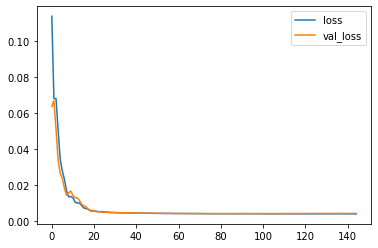

In [11]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [12]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [13]:
r2_score(y_test,y_pred)

0.7242716788859003